## Scraping British Museum 
Donia Khaled

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import json
import os

In [3]:
# Specify the directory where your JSON files are located
json_files_directory = 'data'

# Specify the name of the output combined JSON file
output_json_file = 'result.json'

# Initialize an empty list to store the combined data
combined_data = []

# Iterate over each JSON file in the directory
for filename in os.listdir(json_files_directory):
    if filename.endswith('.json'):
        # Construct the full path to the JSON file
        file_path = os.path.join(json_files_directory, filename)
        
        # Load the data from the current JSON file
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            
            # # Add a "Path" key with the file name to each dictionary
            data['path'] = filename
            
            # # Append the data from the current file to the combined_data list
            combined_data.append(data)

# Write the combined data to the output JSON file
with open(output_json_file, 'w') as output_file:
    json.dump(combined_data, output_file, indent=2)

print(f'Combined data with "Path" key written to {output_json_file}')

Combined data with "Path" key written to result.json


In [13]:
# read the data
data = json.load(open('result.json', encoding='utf8'))

df = pd.DataFrame(data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56835 entries, 0 to 56834
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   artifact_name                56835 non-null  object
 1   Object Type                  56834 non-null  object
 2   Museum number                48571 non-null  object
 3   Description                  56835 non-null  object
 4   Production date              33654 non-null  object
 5   Production place             28224 non-null  object
 6   Excavator/field collector    18024 non-null  object
 7   Findspot                     45990 non-null  object
 8   Materials                    56076 non-null  object
 9   Technique                    32681 non-null  object
 10  Dimensions                   55189 non-null  object
 11  Curator's comments           30119 non-null  object
 12  Bibliographic references     39284 non-null  object
 13  Location                     56

In [14]:
df.head()

,artifact_name,Object Type,Museum number,Description,Production date,Production place,Excavator/field collector,Findspot,Materials,Technique,...,Banknote serial number,Associated ethnic name,Production ethnic group,Ware,BM/Big number,Inscription subject,Associated objects,School/style,Joined objects,Escapement
0,ear-ring; bead,"[ ear-ring , bead ]",[1880.3687.m],[ Copper alloy ear-ring of thin wire with a lo...,[1stC-3rdC (?)],[ Made in: Afghanistan ],[Field Collection by: Charles Masson],[ Found/Acquired: Begram ],[copper alloy],"[ cast , pierced , twisted (wire) ]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,hair-pin; dress-pin,"[ hair-pin , dress-pin ]",[1880.3711.o],[ Copper alloy ornamental hair- or dress-pin h...,[ 1stC BC-early 1stC (circa) ],[ Made in: Afghanistan ],NaN,[ Found/Acquired: Begram ],[copper alloy],[cast],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,hair-pin; dress-pin,"[ hair-pin , dress-pin ]",[1880.3711.o],[ Copper alloy ornamental hair- or dress-pin h...,[1stC BC-early 1stC (circa)],[ Made in: Afghanistan ],[Field Collection by: Charles Masson],[ Found/Acquired: Begram ],[copper alloy],[cast],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hair-pin; dress-pin,"[ hair-pin , dress-pin ]",[1880.3711.o],[ Copper alloy ornamental hair- or dress-pin h...,[1stC BC-early 1stC (circa)],[ Made in: Afghanistan ],[Field Collection by: Charles Masson],[ Found/Acquired: Begram ],[copper alloy],[cast],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ear-ring,[ear-ring],[1880.3717.f],"[ Cast, copper alloy hoop ear-ring bound with ...",[1stC-3rdC (circa)],[ Made in: Afghanistan ],[Field Collection by: Charles Masson],[ Found/Acquired: Begram ],[copper alloy],[cast],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
len(df)

56835

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56835 entries, 0 to 56834
Data columns (total 52 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   artifact_name                56835 non-null  object
 1   Object Type                  56834 non-null  object
 2   Museum number                48571 non-null  object
 3   Description                  56835 non-null  object
 4   Production date              33654 non-null  object
 5   Production place             28224 non-null  object
 6   Excavator/field collector    18024 non-null  object
 7   Findspot                     45990 non-null  object
 8   Materials                    56076 non-null  object
 9   Technique                    32681 non-null  object
 10  Dimensions                   55189 non-null  object
 11  Curator's comments           30119 non-null  object
 12  Bibliographic references     39284 non-null  object
 13  Location                     56

In [17]:
df.isna().sum()

artifact_name                      0
Object Type                        1
Museum number                   8264
Description                        0
Production date                23181
Production place               28611
Excavator/field collector      38811
Findspot                       10845
Materials                        759
Technique                      24154
Dimensions                      1646
Curator's comments             26716
Bibliographic references       17551
Location                         542
Acquisition name               16981
Acquisition date               15013
Acquisition notes              51050
Department                         0
Registration number             8264
Additional IDs                 36268
path                               0
 Excavator/field collector     56832
Subjects                       44166
Authority                      49572
$Inscriptions                  34529
Cultures/periods                6307
Title                          55432
P

In [18]:
df[df["path"] == "Y_EA17170.json"]

,artifact_name,Object Type,Museum number,Description,Production date,Production place,Excavator/field collector,Findspot,Materials,Technique,...,Banknote serial number,Associated ethnic name,Production ethnic group,Ware,BM/Big number,Inscription subject,Associated objects,School/style,Joined objects,Escapement
36968,statue,[statue],[EA17170],[ Fragmentary upper body of a limestone male f...,NaN,NaN,NaN,[ Found/Acquired: Egypt ],[limestone],[painted],...,NaN,NaN,NaN,NaN,[EA17170],NaN,NaN,NaN,NaN,NaN


In [19]:
df.columns

Index(['artifact_name', 'Object Type', 'Museum number', 'Description',
       'Production date', 'Production place', 'Excavator/field collector',
       'Findspot', 'Materials', 'Technique', 'Dimensions',
       'Curator's comments', 'Bibliographic references', 'Location',
       'Acquisition name', 'Acquisition date', 'Acquisition notes',
       'Department', 'Registration number', 'Additional IDs', 'path',
       ' Excavator/field collector ', 'Subjects', 'Authority', '$Inscriptions',
       'Cultures/periods', 'Title', 'Producer name', 'Exhibition history',
       'Associated places', 'Funder name', 'Conservation', 'Condition',
       'Associated names', 'Associated events', 'Associated titles',
       'C&M catalogue number', 'State', 'Regnal date', 'Denomination',
       'Previous owner', 'Type series', 'Banknote serial number',
       'Associated ethnic name', 'Production ethnic group', 'Ware',
       'BM/Big number', 'Inscription subject', 'Associated objects',
       'School/sty

In [21]:
columns_to_keep = ['artifact_name', 'Object Type', 'Production date', 'Description', 'Materials', 'Cultures/periods', 'path']

reduced_df = df.loc[:, columns_to_keep]


In [22]:
reduced_df[reduced_df["path"] == "Y_EA17170.json"]

,artifact_name,Object Type,Production date,Description,Materials,Cultures/periods,path
36968,statue,[statue],NaN,[ Fragmentary upper body of a limestone male f...,[limestone],[19th Dynasty],Y_EA17170.json


In [23]:
reduced_df.head()

,artifact_name,Object Type,Production date,Description,Materials,Cultures/periods,path
0,ear-ring; bead,"[ ear-ring , bead ]",[1stC-3rdC (?)],[ Copper alloy ear-ring of thin wire with a lo...,[copper alloy],NaN,A_1880-3687-m.json
1,hair-pin; dress-pin,"[ hair-pin , dress-pin ]",[ 1stC BC-early 1stC (circa) ],[ Copper alloy ornamental hair- or dress-pin h...,[copper alloy],NaN,A_1880-3711-o.json
2,hair-pin; dress-pin,"[ hair-pin , dress-pin ]",[1stC BC-early 1stC (circa)],[ Copper alloy ornamental hair- or dress-pin h...,[copper alloy],NaN,A_1880-3714-a.json
3,hair-pin; dress-pin,"[ hair-pin , dress-pin ]",[1stC BC-early 1stC (circa)],[ Copper alloy ornamental hair- or dress-pin h...,[copper alloy],NaN,A_1880-3717-f.json
4,ear-ring,[ear-ring],[1stC-3rdC (circa)],"[ Cast, copper alloy hoop ear-ring bound with ...",[copper alloy],NaN,A_1880-3960.json


In [26]:
def convert_list_to_string(lst):
    if isinstance(lst, list) and all(isinstance(elem, (int, str)) for elem in lst):
        return ', '.join(map(str, lst))
    elif pd.isna(lst):
        return ''
    else:
        return str(lst)

In [28]:
# List of columns to convert
columns_to_convert = ['Object Type', 'Production date', 'Description', 'Materials']

# Apply the conversion function to each specified column
for column in columns_to_convert:
    reduced_df[column] = reduced_df[column].apply(convert_list_to_string)

In [29]:
reduced_df

,artifact_name,Object Type,Production date,Description,Materials,Cultures/periods,path
0,ear-ring; bead,"ear-ring , bead",1stC-3rdC (?),Copper alloy ear-ring of thin wire with a loo...,copper alloy,NaN,A_1880-3687-m.json
1,hair-pin; dress-pin,"hair-pin , dress-pin",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,A_1880-3711-o.json
2,hair-pin; dress-pin,"hair-pin , dress-pin",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,A_1880-3714-a.json
3,hair-pin; dress-pin,"hair-pin , dress-pin",1stC BC-early 1stC (circa),Copper alloy ornamental hair- or dress-pin he...,copper alloy,NaN,A_1880-3717-f.json
4,ear-ring,ear-ring,1stC-3rdC (circa),"Cast, copper alloy hoop ear-ring bound with t...",copper alloy,NaN,A_1880-3960.json
...,...,...,...,...,...,...,...
56830,papyrus,papyrus,,Papyrus Harris; column 75; Discourse to Manki...,papyrus,[20th Dynasty],Y_EA9999-75.json
56831,papyrus,papyrus,,Papyrus Harris; column 76; Discourse to Manki...,papyrus,[20th Dynasty],Y_EA9999-76.json
56832,papyrus,papyrus,,Papyrus Harris; column 77; Discourse to Manki...,papyrus,[20th Dynasty],Y_EA9999-77.json
56833,papyrus,papyrus,,Papyrus Harris; column 78; Discourse to Manki...,papyrus,[20th Dynasty],Y_EA9999-78.json


In [30]:
reduced_df[reduced_df["path"] == "Y_EA17170.json"]

,artifact_name,Object Type,Production date,Description,Materials,Cultures/periods,path
36968,statue,statue,,Fragmentary upper body of a limestone male fi...,limestone,[19th Dynasty],Y_EA17170.json


In [32]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os
import json
import random
from PIL import Image
import IPython.display as display

In [33]:
reduced_df.to_csv("British_result.csv")

In [34]:
def print_value_count(df, col, range):
    x =df[col].value_counts()
    plt.figure(figsize=(12,8))
    plt.xticks(rotation=90)
    plt.bar(x = x.index[0:range] ,  height= x.values[0:range])
    return x.index[0:range]

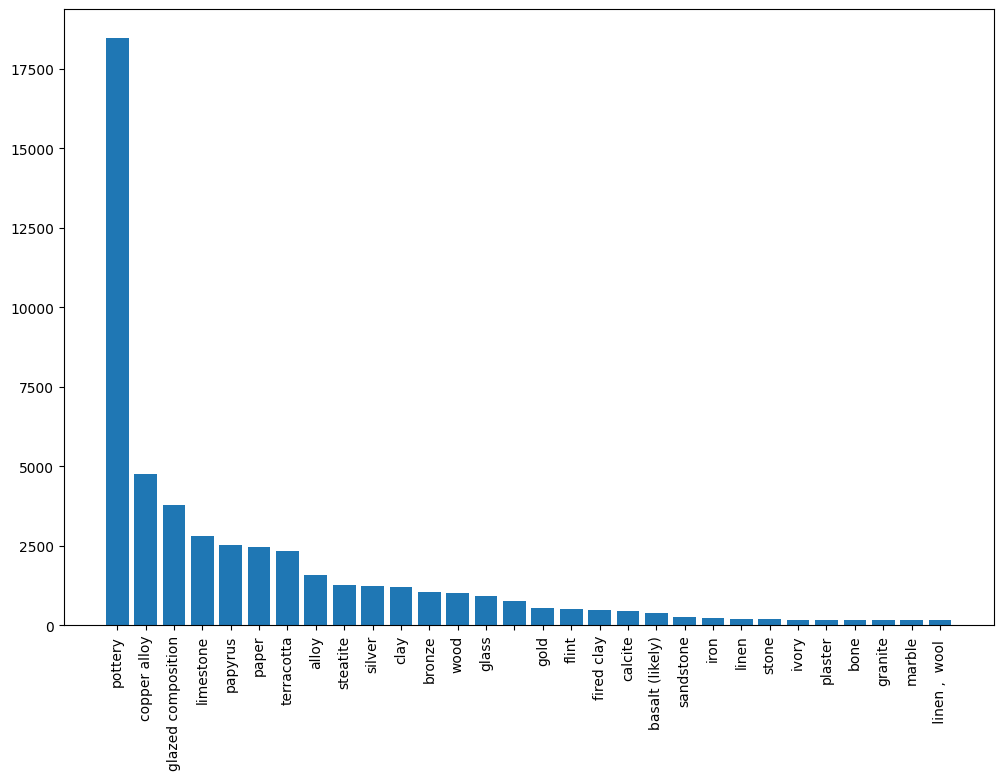

In [35]:
top30_material = print_value_count(reduced_df, "Materials", 30)

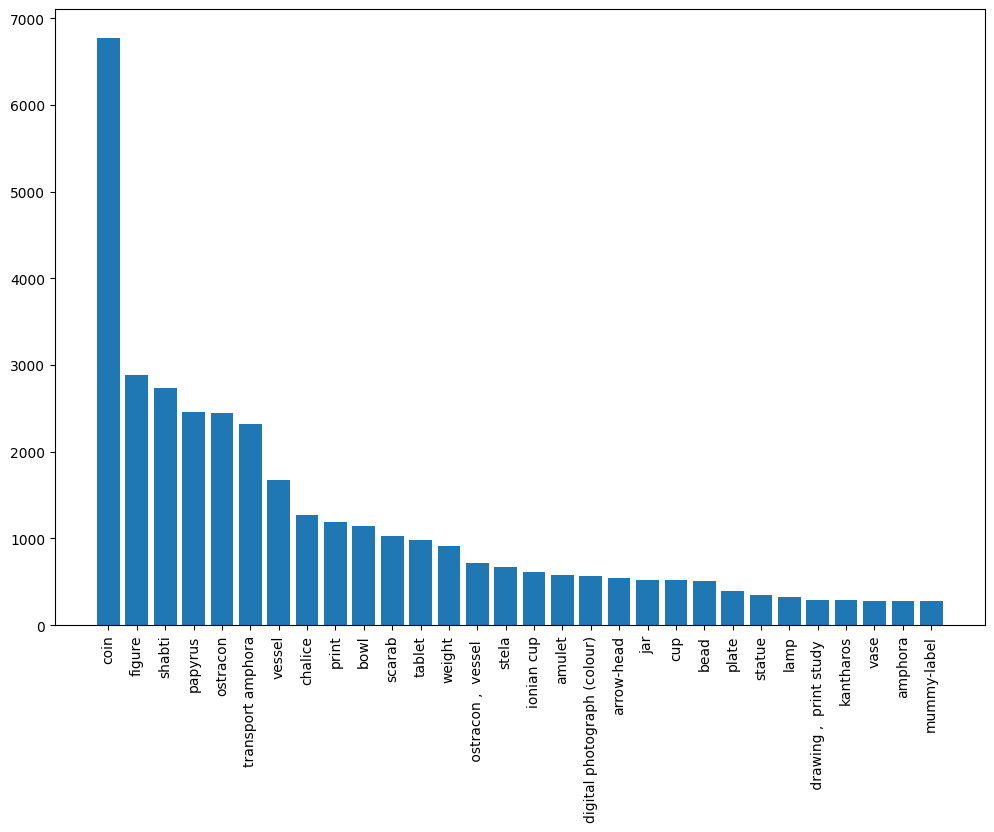

In [36]:
top30_material = print_value_count(reduced_df, "Object Type", 30)